# Bayesian Likelihood How to Notebook
This notebook will hopefully guide you how to use the programs in bayesian likelihood. At some point I will make this a moduel, but that's a future Cody problem. 

In [1]:
import pickle
stars = pickle.load(open("/home/cody/Binary Search/all_average_rv_example.pck", "rb" ) )

"stars" is an astropy table object that has the simplified table that was made at the end of the DataSimp notebook. 

We can find the natural log likelihood for a set of model paramiters given the data in stars.

#### 1. Add Jitter
Jitter is a catch all noise term added to the observational noise. We have two parameters that try and account for this. We assume a strate line in log space as a function of surface gravity LOGG. The two parameters are the slope (b) and y intersept (a). For this notebook we just picked a = 0.3, and b = 0.6, but these can be values that you let varry

In [2]:
%run error_with_jitter.py
err_j = error_with_jitter(stars["RADIAL_ERR"],
                         a = 0.3,
                         b = 0.6,
                         logg = stars["LOGG"])

#### 2. Detection Rate
Next we find the detection rate of the data using a chi2, P-value.

In [3]:
%run binary_fraction.py
detection_rate_data = binary_fraction(stars['RADIALV'], err_j)
print(detection_rate_data)

0.41968911917098445


#### 3. ln(likelihood)
For this set of stars about 42% of the observed stars have large enough deviations from their mean value to confidently say they are not solo stars (i.e. binaries). 
Now we need to make synthetic galaxies to then compare the model to the data to then find the likelihood. 

It's important that the same jitter paramiters are used for the detection rate as well as the lnlikelihood

Side note: The inputs to lnlikelihood are coded as possitional arguments, I'm making them keyword arguments for now so you know what they are

In [4]:
%run lnlikelihood.py
import astropy.units as u

In [5]:
LNL = lnlikelihood(detection_rate_data,
                  num_of_galaxies = 50,
                  cloud = stars,
                  bf = 0.8,
                  m_min = 100*u.jupiterMass,
                  mu = 2.5,
                  sigma = 2., 
                  a = 0.3,
                  b = 0.6)

In [6]:
LNL

-5.00080811001625

Not a lot is learned from looking at one likelihood for one model. We want to look at a range of model's and see what fits the best. Here's a simple loop that will check different binary fractions and return all of the log likelihoods for the different fractions

In [7]:
a = 0.3
b = 0.6
mu = 2.5
sigma = 2
fractions = np.linspace(0, 1, 10)
err_j = error_with_jitter(stars['RADIAL_ERR'], a, b, stars['LOGG'])

detection_rate = binary_fraction(stars['RADIALV'], err_j)
lnl = []
for n in range(len(fractions)):
    lnl.append(lnlikelihood(detection_rate,
                            50,
                            stars,
                            fractions[n],
                            100 * u.jupiterMass,
                            mu,
                            sigma,
                            a,
                            b)
               )
    print("Done with,", n) # I like to add print statments so I know how much longer I need to wait. 

Done with, 0
Done with, 1
Done with, 2
Done with, 3
Done with, 4
Done with, 5
Done with, 6
Done with, 7
Done with, 8
Done with, 9


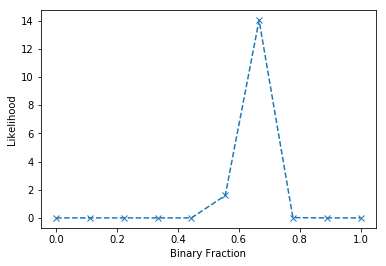

In [10]:
import matplotlib.pyplot as plt
plt.plot(fractions, np.exp(lnl), 'x--')
plt.ylabel("Likelihood")
plt.xlabel("Binary Fraction")
plt.show()

lnprob.py is set up to use lnlikelihood with emcee to explore a wide range of paramiter space. 

In [15]:
import emcee
%run lnprob.py
ndim, nwalkers = 5, 10
pos = [np.array([0.5,0.3, 0.61, 2.5, 2]) + 0.3*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob,
                                    threads=8,
                                    args=(50,
                                          stars,
                                          100*u.jupiterMass,
                                          )
                                    )

Done with binary fraction,  0.21834764312933613
Done with binary fraction,  0.33928619460025944
Done with binary fraction,  0.07867944065614757
Done with binary fraction,  0.32282767218453184
Done with binary fraction,  0.4447445077449151
Done with binary fraction,  0.33992885182978194
Done with binary fraction,  0.5026554436414733
Done with binary fraction,  0.3918198281272491
Done with binary fraction,  0.7967025844099558
Done with binary fraction,  0.624448575554506
Done with binary fraction,  0.27615247118459374
Done with binary fraction,  0.17184311490687632
Done with binary fraction,  0.07263399081089378
Done with binary fraction,  0.9777876836003849
Done with binary fraction,  0.40784905560603546
Done with binary fraction,  0.22784166465547173
Done with binary fraction,  0.3718728252276411
Done with binary fraction,  0.9335724363555609
Done with binary fraction,  0.4311159838487111
Done with binary fraction,  0.8304694526748135
Done with binary fraction,  0.7522880656288136
Done

Done with binary fraction,  0.7892084265717415
Done with binary fraction,  0.18490538779615107
Done with binary fraction,  0.7171971410997846
Done with binary fraction,  0.7099792867460923
Done with binary fraction,  0.798578119654026
Done with binary fraction,  0.2650460511713083
Done with binary fraction,  0.4008798123983296
Done with binary fraction,  0.829501546296497
Done with binary fraction,  0.6161758819515165
Done with binary fraction,  0.4933922854470589
Done with binary fraction,  0.8560184189212422
Done with binary fraction,  0.28546107293033396
Done with binary fraction,  0.8110686758007101
Done with binary fraction,  0.414464488935166
Done with binary fraction,  0.6507730794799315
You got stuck
Done with binary fraction,  0.6422844764899179
Done with binary fraction,  0.3696143828158775
Done with binary fraction,  0.8808455861422042
You got stuck
You got stuck
Done with binary fraction,  0.05168463309667515
Done with binary fraction,  0.6385877331426558
Done with binary f

Done with binary fraction,  0.7986764088077885
Done with binary fraction,  0.6644903895703815
Done with binary fraction,  0.76511919744618
Done with binary fraction,  0.6786836272836805
Done with binary fraction,  0.15178812033534406
Done with binary fraction,  0.18710101843810945
Done with binary fraction,  0.05024378326498441
Done with binary fraction,  0.5385754352878624
Done with binary fraction,  0.02520531098729406
Done with binary fraction,  0.4800645599514586
Done with binary fraction,  0.1538959237928225
Done with binary fraction,  0.11783193338425324
Done with binary fraction,  0.5826803341213401
Done with binary fraction,  0.5171096109038663
Done with binary fraction,  0.9696021491063957
Done with binary fraction,  0.9476630591601101
Done with binary fraction,  0.6390972150355542
Done with binary fraction,  0.7474882902924566
Done with binary fraction,  0.5302413195635293
Done with binary fraction,  0.6890968823342487
Done with binary fraction,  0.8531487375590432
Done with 

Done with binary fraction,  0.30246028269197117
Done with binary fraction,  0.6044588057445355
Done with binary fraction,  0.6597576615150222
Done with binary fraction,  0.599700736668168
Done with binary fraction,  0.6303431741265693
Done with binary fraction,  0.5194771830376052
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You got stuck
You 

You got stuck
Done with binary fraction,  0.3533763212762326
Done with binary fraction,  0.569191686388745
Done with binary fraction,  0.2668582306964471
Done with binary fraction,  0.702205535774229
Done with binary fraction,  0.5805084441593309
Done with binary fraction,  0.5745936752418368
Done with binary fraction,  0.7018709994156549
Done with binary fraction,  0.24178791402371907
Done with binary fraction,  0.6817392117977272
Done with binary fraction,  0.6115865663406178
Done with binary fraction,  0.1527590227332321
Done with binary fraction,  0.05157280390538635
Done with binary fraction,  0.6577409918395696
You got stuck
Done with binary fraction,  0.37012198275218255
Done with binary fraction,  0.9499542243045613
Done with binary fraction,  0.5340602267533779
You got stuck
You got stuck
Done with binary fraction,  0.5597334169003901
Done with binary fraction,  0.6978379518077373
Done with binary fraction,  0.05751590255121711
Done with binary fraction,  0.5435220054842376
Do

In [16]:
sampler.run_mcmc(pos, 100)

/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


(array([[ 0.62023288, -0.55003101,  0.87061353,  2.12793033,  0.70253732],
        [ 0.58290433,  0.50895899,  0.6201841 ,  2.8524869 ,  2.29695732],
        [ 0.52827111, -0.99301115,  1.05172971,  1.1920132 ,  0.68304924],
        [ 0.25856497,  0.76646387,  0.57704031,  2.79691445,  2.05197447],
        [ 0.6758233 ,  0.40449352,  0.62088793,  3.07532919,  1.17412221],
        [ 0.29997614,  0.35516736,  0.41424062,  2.70574149,  1.96135503],
        [ 0.05582456,  0.61228427,  0.32385578,  2.40887034,  1.11989954],
        [ 0.55049386, -0.57670436,  1.44237383,  1.87035776,  0.77952429],
        [ 0.70053246, -0.68908356,  1.8245387 ,  1.19424808,  1.94654087],
        [ 0.0575159 ,  0.29553609,  0.23732292,  2.34965216,  2.97430293]]),
 array([1.62827648, 2.78727588, 2.73180453, 1.79432874, 2.38965318,
        2.89253076, 3.20458771, 2.77029965, 2.38039705, 1.92491079]),
 ('MT19937', array([ 330626753, 1772616558, 3077111111,  640820886, 3174900307,
         1738259782, 383186904

In [17]:
sampler.acceptance_fraction

array([0.21, 0.2 , 0.17, 0.26, 0.27, 0.21, 0.15, 0.39, 0.34, 0.21])

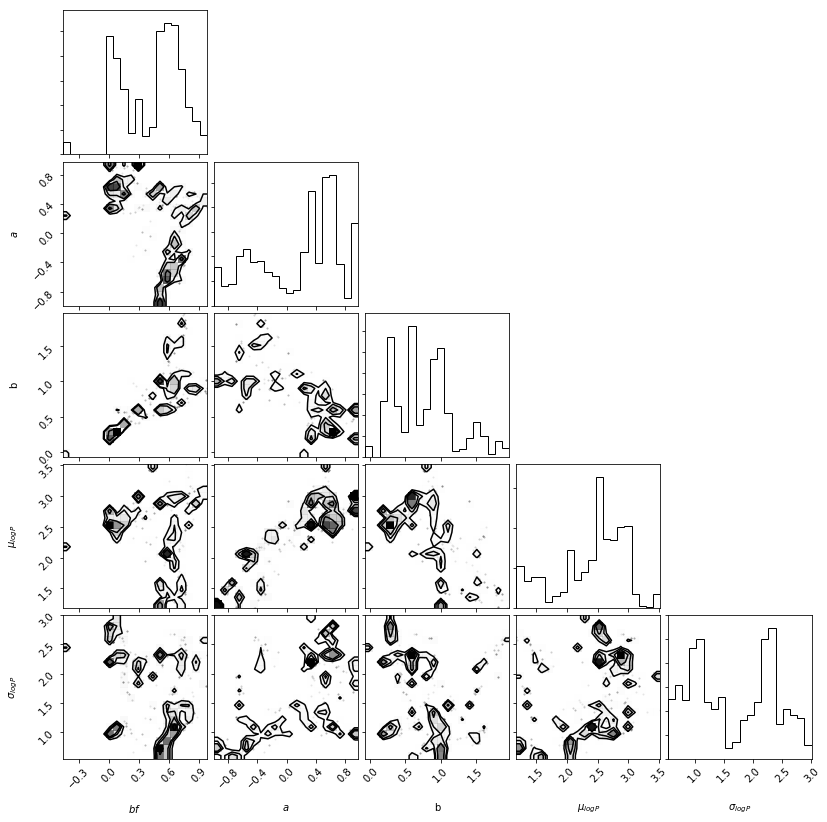

In [19]:
import corner
samples = sampler.chain[:,:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$bf$", "$a$", "b","$\mu_{logP}$", "$\sigma_{logP}$"],
                    )